<a href="https://colab.research.google.com/github/Luancg248/Luancg248/blob/main/pandastigresblank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pandas-tigres.zip to pandas-tigres (1).zip


In [ ]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['pandas-tigres.zip']), 'r')
data.extractall()

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
 
pandas_folder_path="/content/tigres"
tigres=[]
img_size=150
for img in os.listdir(pandas_folder_path):
    img = cv2.imread(os.path.join(pandas_folder_path,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    tigres.append(img_resize)

In [ ]:
tigres = np.array(tigres)
print(tigres.shape)

(12, 150, 150, 3)


In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
 
pandas_folder_path="/content/pandas"
pandast=[]
img_size=150
for img in os.listdir(pandas_folder_path):
    img = cv2.imread(os.path.join(pandas_folder_path,img))
    #img_gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_resize= cv2.resize(img,(img_size,img_size))
    pandast.append(img_resize)

In [ ]:
pandast = np.array(pandast)
print(pandast.shape)

(15, 150, 150, 3)


(150, 150, 3)


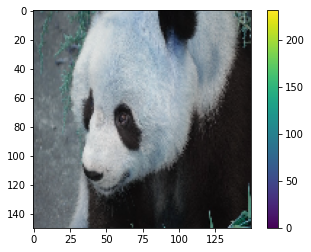

In [ ]:
print(pandast[1].shape)
plt.figure()
plt.imshow(np.squeeze(pandast[1]))
plt.colorbar()
plt.grid(False)
plt.show()

# **¡Nuevo!**

In [ ]:
images = np .concatenate([tigres,pandast])
print(len(images))
Images = np.array(images)
print(Images.shape)

27
(27, 150, 150, 3)


In [ ]:
etiquetas_tigres = np.repeat(0,12)
print(len(etiquetas_tigres))
print(etiquetas_tigres)

12
[0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
etiquetas_pandas = np.repeat(1,15)
print(len(etiquetas_pandas))
print(etiquetas_pandas)

15
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
class_names=['Tigre','Panda']

In [ ]:
labels = np.concatenate([etiquetas_tigres,etiquetas_pandas])
print(len(labels))
print(labels)
Labels = np.array(labels)
print(Labels.shape)


27
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(27,)


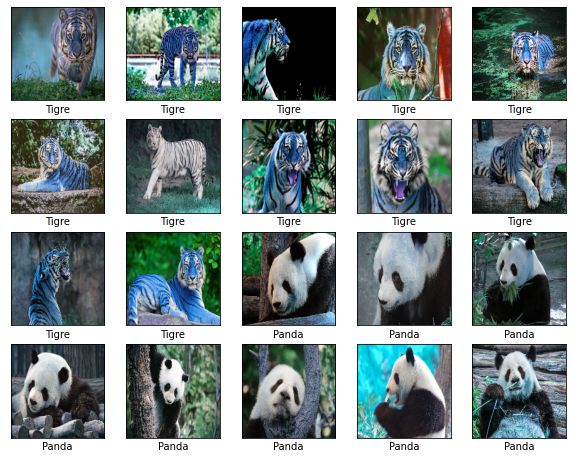

In [ ]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Images[i])
    #, cmap=plt.cm.binary
    plt.xlabel(class_names[Labels[i]])
plt.show()

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as Optimizer

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.9.2


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(150, 150,3)),
    keras.layers.Dense(128, activation='relu'),
    
    keras.layers.Dense(2, activation='softmax'),
    
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(Images, Labels, epochs=30)
trained=model.fit(Images, Labels, epochs=30)

Epoch 1/30
1/1 [==============================] - 0s 285ms/step - loss: 160.1396 - accuracy: 0.5556
Epoch 2/30
1/1 [==============================] - 0s 37ms/step - loss: 25101.4492 - accuracy: 0.4444
Epoch 3/30
1/1 [==============================] - 0s 35ms/step - loss: 12813.7832 - accuracy: 0.4444
Epoch 4/30
1/1 [==============================] - 0s 42ms/step - loss: 106.3179 - accuracy: 0.8148
Epoch 5/30
1/1 [==============================] - 0s 35ms/step - loss: 2094.6091 - accuracy: 0.5556
Epoch 6/30
1/1 [==============================] - 0s 35ms/step - loss: 2032.6571 - accuracy: 0.5556
Epoch 7/30
1/1 [==============================] - 0s 33ms/step - loss: 1565.9216 - accuracy: 0.5556
Epoch 8/30
1/1 [==============================] - 0s 42ms/step - loss: 759.1910 - accuracy: 0.5556
Epoch 9/30
1/1 [==============================] - 0s 36ms/step - loss: 41.8874 - accuracy: 0.8889
Epoch 10/30
1/1 [==============================] - 0s 35ms/step - loss: 659.6204 - accuracy: 0.4444
Ep

In [ ]:
img=Images[0]
print(img.shape)
img = (np.expand_dims(img,0))
print(img.shape)

(150, 150, 3)
(1, 150, 150, 3)


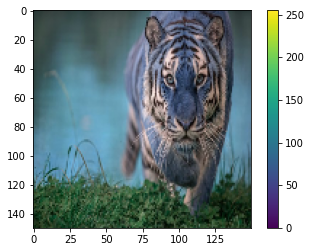

In [ ]:
plt.figure()
plt.imshow(Images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
predictions_single = model.predict(img)
print(predictions_single)
print(np.sum( predictions_single))
print(np.argmax(predictions_single))
print(class_names[np.argmax(predictions_single)])

1/1 [==============================] - 0s 15ms/step
[[1. 0.]]
1.0
0
Tigre


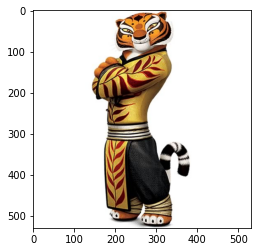

In [ ]:
import cv2
img= cv2.imread("kungfutigresa.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [ ]:
img2=img_cvt
img2=cv2.resize(img2,(img_size,img_size))
print(img2.shape)
img2 = (np.expand_dims(img2,0))
print(img2.shape)


(150, 150, 3)
(1, 150, 150, 3)


In [ ]:
predictions_single = model.predict(img2)
print(predictions_single)
print(np.sum(predictions_single))
print(np.argmax(predictions_single))
print(class_names[np.argmax(predictions_single)])


1/1 [==============================] - 0s 14ms/step
[[1. 0.]]
1.0
0
Tigre


# Nueva sección

# Nueva sección